In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
import operator
import math
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats
from scipy.stats import norm

In [ ]:
crypto = 'BTC'
crypto2 = 'ETH'
against_crypto = 'USD'
start = dt.date(2017, 11, 9)
end = dt.date.today()

df1 = yf.download(f'{crypto}-{against_crypto}', start=start, end=end)
df2 = yf.download(f'{crypto2}-{against_crypto}', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df1
btc=df1.drop(['Adj Close','Close','High','Low','Volume'],1)
btc

,Open
Date,
2017-11-09,7446.830078
2017-11-10,7173.729980
2017-11-11,6618.609863
2017-11-12,6295.450195
2017-11-13,5938.250000
...,...
2023-09-06,25783.931641
2023-09-07,25748.312500
2023-09-08,26245.208984


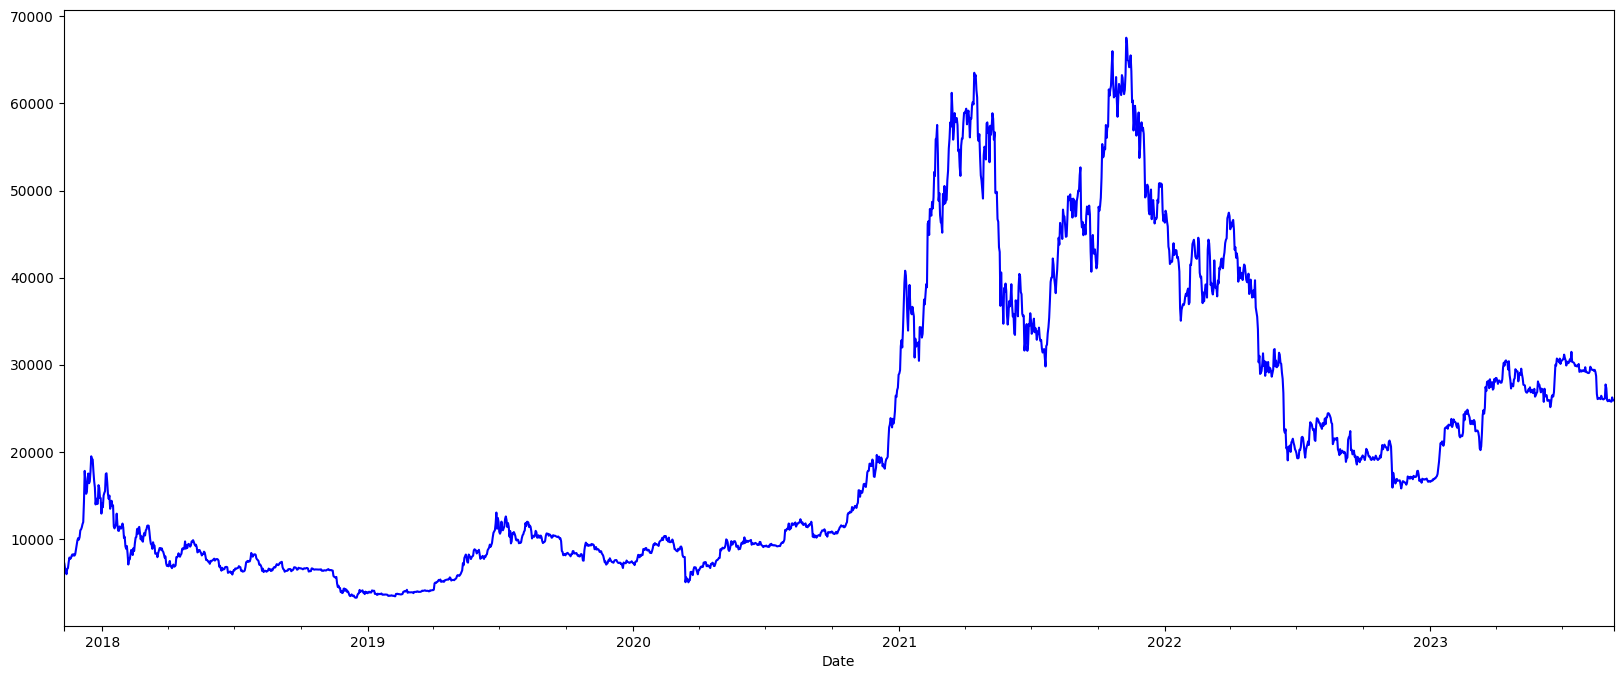

In [ ]:
btc['Open'].plot(figsize=(20,8),color='blue')
plt.show()

In [ ]:
df2
eth=df2.drop(['Adj Close','Close','High','Low','Volume'],1)
eth

,Open
Date,
2017-11-09,308.644989
2017-11-10,320.670990
2017-11-11,298.585999
2017-11-12,314.690002
2017-11-13,307.024994
...,...
2023-09-06,1633.912109
2023-09-07,1632.262817
2023-09-08,1647.807617


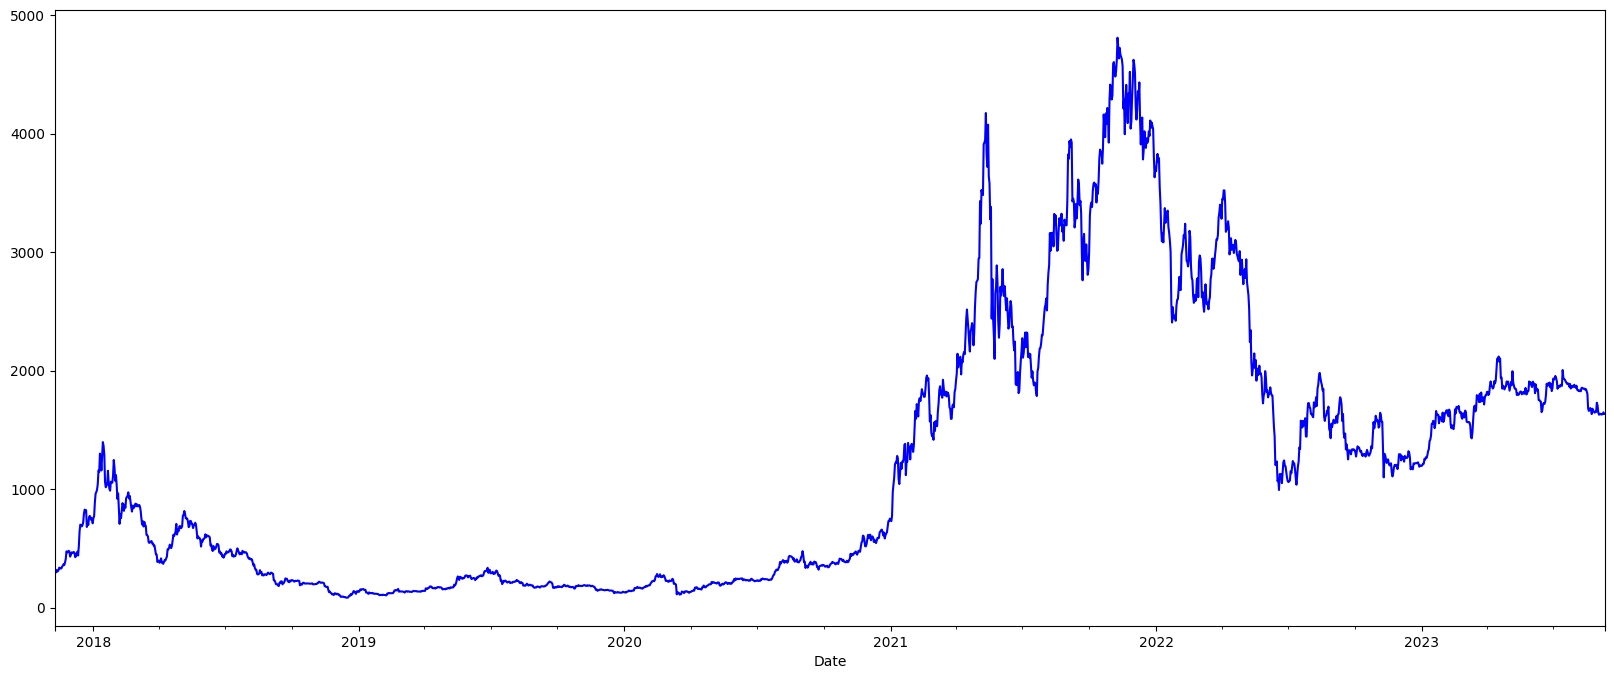

In [ ]:

eth['Open'].plot(figsize=(20,8),color='blue')
plt.show()

In [ ]:
btc.describe()

,Open
count,2132.000000
mean,20844.039883
std,15960.235169
min,3236.274658
25%,8193.318726
50%,14645.050293
75%,30101.521973
max,67549.734375


In [ ]:
eth.describe()

,Open
count,2132.000000
mean,1202.576876
std,1134.873026
min,84.279694
25%,226.082260
50%,732.102905
75%,1839.590607
max,4810.071289


In [ ]:
btc_return = round(np.log(btc).diff() * 100, 2)
btc_return.dropna(inplace = True)
eth_return = round(np.log(eth).diff() * 100, 2)
eth_return.dropna(inplace = True)
btc_return

,Open
Date,
2017-11-10,-3.74
2017-11-11,-8.05
2017-11-12,-5.01
2017-11-13,-5.84
2017-11-14,9.98
...,...
2023-09-06,-0.12
2023-09-07,-0.14
2023-09-08,1.91


In [ ]:
eth_return

,Open
Date,
2017-11-10,3.82
2017-11-11,-7.14
2017-11-12,5.25
2017-11-13,-2.47
2017-11-14,3.12
...,...
2023-09-06,0.25
2023-09-07,-0.10
2023-09-08,0.95


In [ ]:
btc_return.describe()

,Open
count,2131.000000
mean,0.058405
std,3.867493
min,-45.560000
25%,-1.470000
50%,0.060000
75%,1.715000
max,22.150000


In [ ]:
eth_return.describe()

,Open
count,2131.000000
mean,0.078329
std,4.903377
min,-54.700000
25%,-2.025000
50%,0.070000
75%,2.455000
max,23.230000


In [ ]:
n, minmax, mean, var, skew, kurt = stats.describe(btc_return)
mini, maxi = minmax
std = var ** .5



x = norm.rvs(mean, std, n)


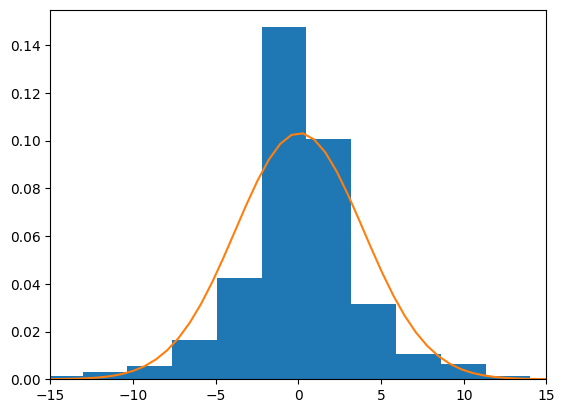

In [ ]:
plt.hist(btc_return, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-15,15);

In [ ]:
n, minmax, mean, var, skew, kurt = stats.describe(eth_return)
mini, maxi = minmax
std = var ** .5



x = norm.rvs(mean, std, n)

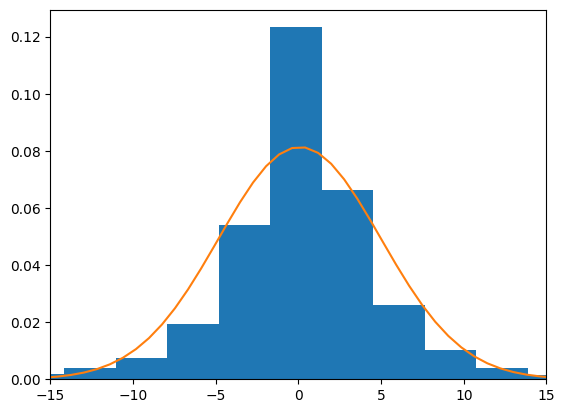

In [ ]:
plt.hist(eth_return, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-15,15);

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfullerbtc = adfuller(btc)
print('ADF statistic for btc : %f' % adfullerbtc[0])
print('p-value for btc: %f' % adfullerbtc[1])
print('Critical Values for btc:')
for key, value in adfullerbtc[4].items():
    print('\t%s: %.3f' % (key, value))

if adfullerbtc[0] < adfullerbtc[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF statistic for btc : -1.514316
p-value for btc: 0.526418
Critical Values for btc:
	1%: -3.433
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
adfullereth = adfuller(eth)
print('ADF statistic for eth: %f' % adfullereth[0])
print('p-value for eth: %f' % adfullereth[1])
print('Critical Values:')
for key, value in adfullereth[4].items():
    print('\t%s: %.3f' % (key, value))

if adfullereth[0] < adfullereth[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF statistic for eth: -1.491117
p-value for eth: 0.537901
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
adfullerbtc_return = adfuller(btc_return)
print('ADF statistic for btc : %f' % adfullerbtc_return[0])
print('p-value for btc: %f' % adfullerbtc_return[1])
print('Critical Values for btc:')
for key, value in adfullerbtc_return[4].items():
    print('\t%s: %.3f' % (key, value))

if adfullerbtc_return[0] < adfullerbtc_return[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF statistic for btc : -31.750068
p-value for btc: 0.000000
Critical Values for btc:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary


In [ ]:
adfullereth_return = adfuller(eth_return)
print('ADF statistic for btc : %f' % adfullereth_return[0])
print('p-value for btc: %f' % adfullereth_return[1])
print('Critical Values for btc:')
for key, value in adfullereth_return[4].items():
    print('\t%s: %.3f' % (key, value))

if adfullereth_return[0] < adfullereth_return[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF statistic for btc : -13.848589
p-value for btc: 0.000000
Critical Values for btc:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary


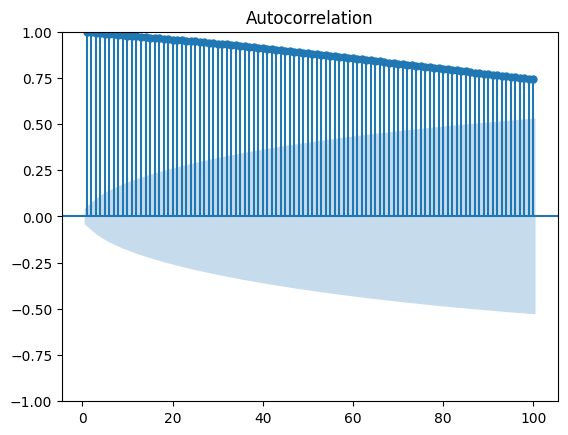

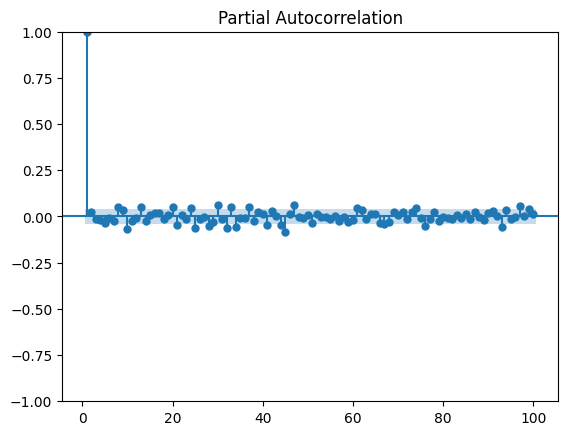

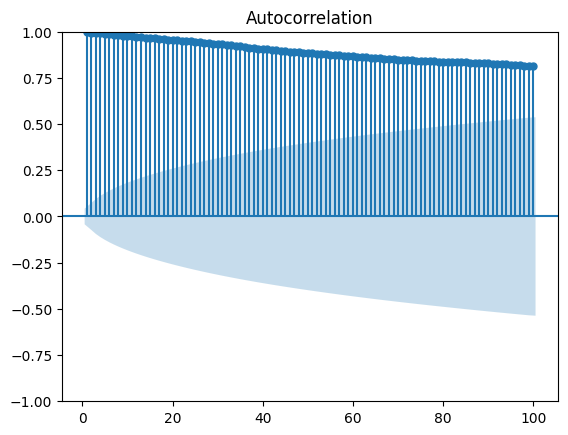

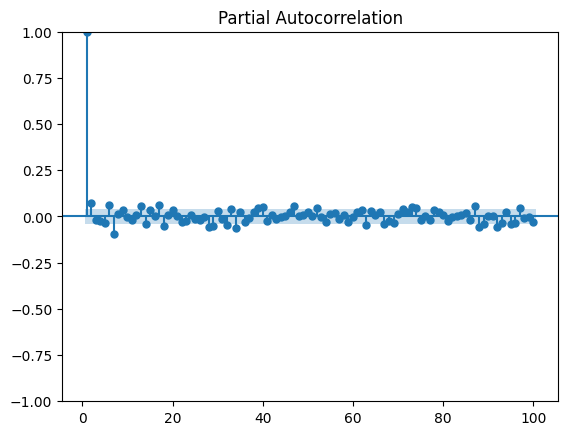

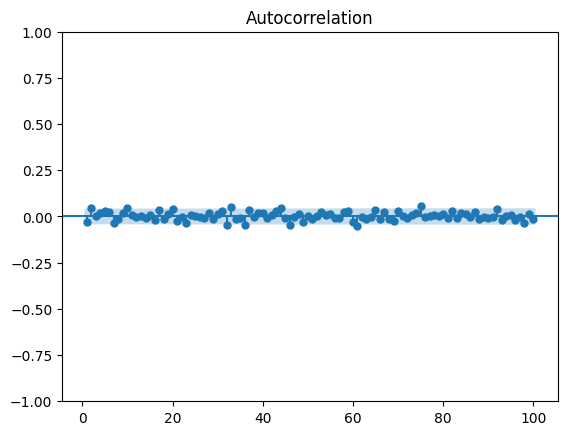

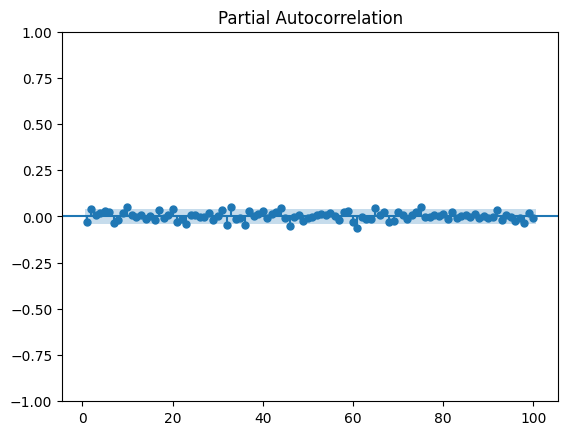

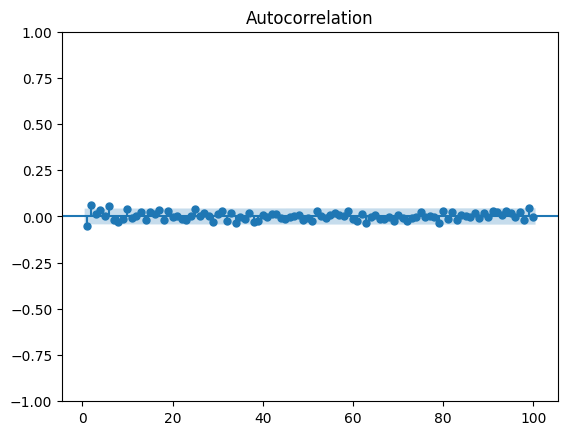

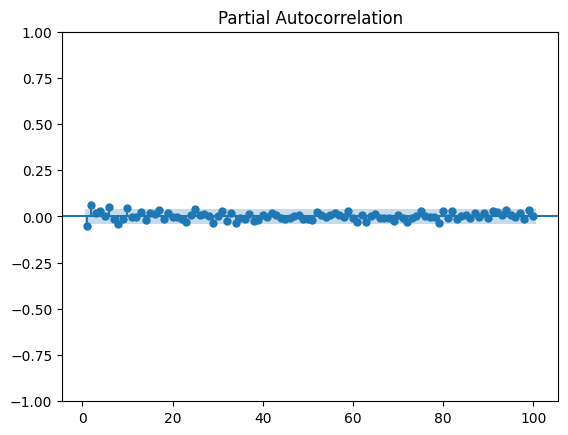

In [ ]:

plot_acf(btc,zero=False,lags=100)
plt.show()

plot_pacf(btc,zero=False,lags=100)
plt.show()

plot_acf(eth,zero=False,lags=100)
plt.show()

plot_pacf(eth,zero=False,lags=100)
plt.show()



plot_acf(btc_return,zero=False,lags=100)
plt.show()

plot_pacf(btc_return,zero=False,lags=100)
plt.show()

plot_acf(eth_return,zero=False,lags=100)
plt.show()

plot_pacf(eth_return,zero=False,lags=100)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.layers import Dense,Dropout,LSTM,Bidirectional, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [ ]:
scaler=StandardScaler()
prediction_days=60
end=math.floor(len(btc)*0.8)

In [ ]:
btc_train=btc[prediction_days:end]
btc_test=btc[end-prediction_days+1:]
btc_train

,Open
Date,
2018-01-08,16476.199219
2018-01-09,15123.700195
2018-01-10,14588.500000
2018-01-11,14968.200195
2018-01-12,13453.900391
...,...
2022-07-06,20194.619141
2022-07-07,20547.814453
2022-07-08,21637.154297


In [ ]:
btc_test

,Open
Date,
2022-05-13,29030.910156
2022-05-14,29285.642578
2022-05-15,30098.585938
2022-05-16,31304.375000
2022-05-17,29862.408203
...,...
2023-09-06,25783.931641
2023-09-07,25748.312500
2023-09-08,26245.208984


In [ ]:
scaled_data=scaler.fit_transform(btc_train.values.reshape(-1,1))
scaled_test=scaler.transform(btc_test.values.reshape(-1,1))

In [ ]:
x_train,y_train=[],[]

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train2=x_train
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))

In [ ]:
x_test=[]

for x in range(prediction_days,len(btc_test)):
    x_test.append(scaled_test[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test2=x_test
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [ ]:
es=EarlyStopping(monitor='loss',min_delta=1e-4,patience=7,verbose=1, mode='auto', restore_best_weights=True)

In [ ]:
mlp=Sequential()

mlp.add(Dense(prediction_days, input_dim=prediction_days, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(1))

In [ ]:
mlp.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
mlp.fit(x_train2,y_train,epochs=100,batch_size=32,callbacks=[es],verbose=2)

Epoch 1/100
50/50 - 4s - loss: 0.3516 - acc: 0.0000e+00 - 4s/epoch - 73ms/step
Epoch 2/100
50/50 - 0s - loss: 0.1906 - acc: 0.0000e+00 - 220ms/epoch - 4ms/step
Epoch 3/100
50/50 - 0s - loss: 0.1363 - acc: 0.0000e+00 - 241ms/epoch - 5ms/step
Epoch 4/100
50/50 - 0s - loss: 0.1180 - acc: 0.0000e+00 - 255ms/epoch - 5ms/step
Epoch 5/100
50/50 - 0s - loss: 0.1119 - acc: 0.0000e+00 - 310ms/epoch - 6ms/step
Epoch 6/100
50/50 - 0s - loss: 0.0953 - acc: 0.0000e+00 - 293ms/epoch - 6ms/step
Epoch 7/100
50/50 - 0s - loss: 0.0947 - acc: 0.0000e+00 - 258ms/epoch - 5ms/step
Epoch 8/100
50/50 - 0s - loss: 0.0938 - acc: 0.0000e+00 - 201ms/epoch - 4ms/step
Epoch 9/100
50/50 - 0s - loss: 0.0802 - acc: 0.0000e+00 - 235ms/epoch - 5ms/step
Epoch 10/100
50/50 - 0s - loss: 0.0777 - acc: 0.0000e+00 - 225ms/epoch - 4ms/step
Epoch 11/100
50/50 - 0s - loss: 0.0751 - acc: 0.0000e+00 - 191ms/epoch - 4ms/step
Epoch 12/100
50/50 - 0s - loss: 0.0720 - acc: 0.0000e+00 - 221ms/epoch - 4ms/step
Epoch 13/100
50/50 - 0s - l

In [ ]:
predictionsmlp=mlp.predict(x_test2)
predictionsmlp=scaler.inverse_transform(predictionsmlp)

14/14 [==============================] - 0s 3ms/step


In [ ]:
results=btc_test[prediction_days:]
results['predictionsmlp']=predictionsmlp
results

,Open,predictionsmlp
Date,,
2022-07-12,19970.474609,21483.644531
2022-07-13,19325.972656,21513.294922
2022-07-14,20211.466797,20697.669922
2022-07-15,20573.156250,20276.179688
2022-07-16,20834.103516,20657.732422
...,...,...
2023-09-06,25783.931641,26556.787109
2023-09-07,25748.312500,26548.417969
2023-09-08,26245.208984,27028.238281


In [ ]:
lstm=Sequential()
lstm.add(LSTM(units=prediction_days,return_sequences=True,input_shape=(1,prediction_days)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=64,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=32,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=32,return_sequences=False))
lstm.add(Dropout(0.2))
lstm.add(Dense(1))

In [ ]:
lstm.compile('adam','mean_squared_error')
lstm.fit(x_train,y_train,epochs=100,batch_size=32,callbacks=[es],verbose=2)

Epoch 1/100
50/50 - 17s - loss: 0.6983 - 17s/epoch - 348ms/step
Epoch 2/100
50/50 - 0s - loss: 0.1306 - 379ms/epoch - 8ms/step
Epoch 3/100
50/50 - 0s - loss: 0.0566 - 427ms/epoch - 9ms/step
Epoch 4/100
50/50 - 0s - loss: 0.0450 - 439ms/epoch - 9ms/step
Epoch 5/100
50/50 - 0s - loss: 0.0388 - 408ms/epoch - 8ms/step
Epoch 6/100
50/50 - 0s - loss: 0.0373 - 426ms/epoch - 9ms/step
Epoch 7/100
50/50 - 0s - loss: 0.0321 - 403ms/epoch - 8ms/step
Epoch 8/100
50/50 - 0s - loss: 0.0363 - 413ms/epoch - 8ms/step
Epoch 9/100
50/50 - 0s - loss: 0.0343 - 430ms/epoch - 9ms/step
Epoch 10/100
50/50 - 0s - loss: 0.0316 - 439ms/epoch - 9ms/step
Epoch 11/100
50/50 - 0s - loss: 0.0287 - 422ms/epoch - 8ms/step
Epoch 12/100
50/50 - 0s - loss: 0.0314 - 415ms/epoch - 8ms/step
Epoch 13/100
50/50 - 0s - loss: 0.0316 - 433ms/epoch - 9ms/step
Epoch 14/100
50/50 - 0s - loss: 0.0326 - 409ms/epoch - 8ms/step
Epoch 15/100
50/50 - 0s - loss: 0.0264 - 416ms/epoch - 8ms/step
Epoch 16/100
50/50 - 0s - loss: 0.0287 - 405ms/e

In [ ]:
predictions=lstm.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions=functools.reduce(operator.iconcat, predictions, [])

14/14 [==============================] - 3s 4ms/step


In [ ]:
results['predictionslstm']=predictions

In [ ]:
bilstm=Sequential()
bilstm.add(Bidirectional(LSTM(units=prediction_days,return_sequences=True,input_shape=(1,prediction_days))))
bilstm.add(Dropout(0.2))
bilstm.add(Bidirectional(LSTM(units=64,return_sequences=True)))
bilstm.add(Dropout(0.2))
bilstm.add(Bidirectional(LSTM(units=32,return_sequences=True)))
bilstm.add(Dropout(0.2))
bilstm.add(Bidirectional(LSTM(units=32,return_sequences=False)))
bilstm.add(Dropout(0.2))
bilstm.add(Dense(1))
bilstm.compile('adam','mean_squared_error')
bilstm.fit(x_train,y_train,epochs=100,batch_size=32,callbacks=[es],verbose=2)

Epoch 1/100
50/50 - 21s - loss: 0.4146 - 21s/epoch - 422ms/step
Epoch 2/100
50/50 - 1s - loss: 0.0687 - 601ms/epoch - 12ms/step
Epoch 3/100
50/50 - 1s - loss: 0.0374 - 764ms/epoch - 15ms/step
Epoch 4/100
50/50 - 1s - loss: 0.0295 - 1s/epoch - 21ms/step
Epoch 5/100
50/50 - 1s - loss: 0.0292 - 1s/epoch - 22ms/step
Epoch 6/100
50/50 - 1s - loss: 0.0266 - 708ms/epoch - 14ms/step
Epoch 7/100
50/50 - 1s - loss: 0.0221 - 612ms/epoch - 12ms/step
Epoch 8/100
50/50 - 1s - loss: 0.0222 - 629ms/epoch - 13ms/step
Epoch 9/100
50/50 - 1s - loss: 0.0222 - 601ms/epoch - 12ms/step
Epoch 10/100
50/50 - 1s - loss: 0.0230 - 653ms/epoch - 13ms/step
Epoch 11/100
50/50 - 1s - loss: 0.0201 - 660ms/epoch - 13ms/step
Epoch 12/100
50/50 - 1s - loss: 0.0192 - 624ms/epoch - 12ms/step
Epoch 13/100
50/50 - 1s - loss: 0.0200 - 638ms/epoch - 13ms/step
Epoch 14/100
50/50 - 1s - loss: 0.0178 - 589ms/epoch - 12ms/step
Epoch 15/100
50/50 - 1s - loss: 0.0184 - 619ms/epoch - 12ms/step
Epoch 16/100
50/50 - 1s - loss: 0.0233 -

In [ ]:
predictions=bilstm.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions=functools.reduce(operator.iconcat, predictions, [])

14/14 [==============================] - 3s 5ms/step


In [ ]:
results['predictionsbilstm']=predictions

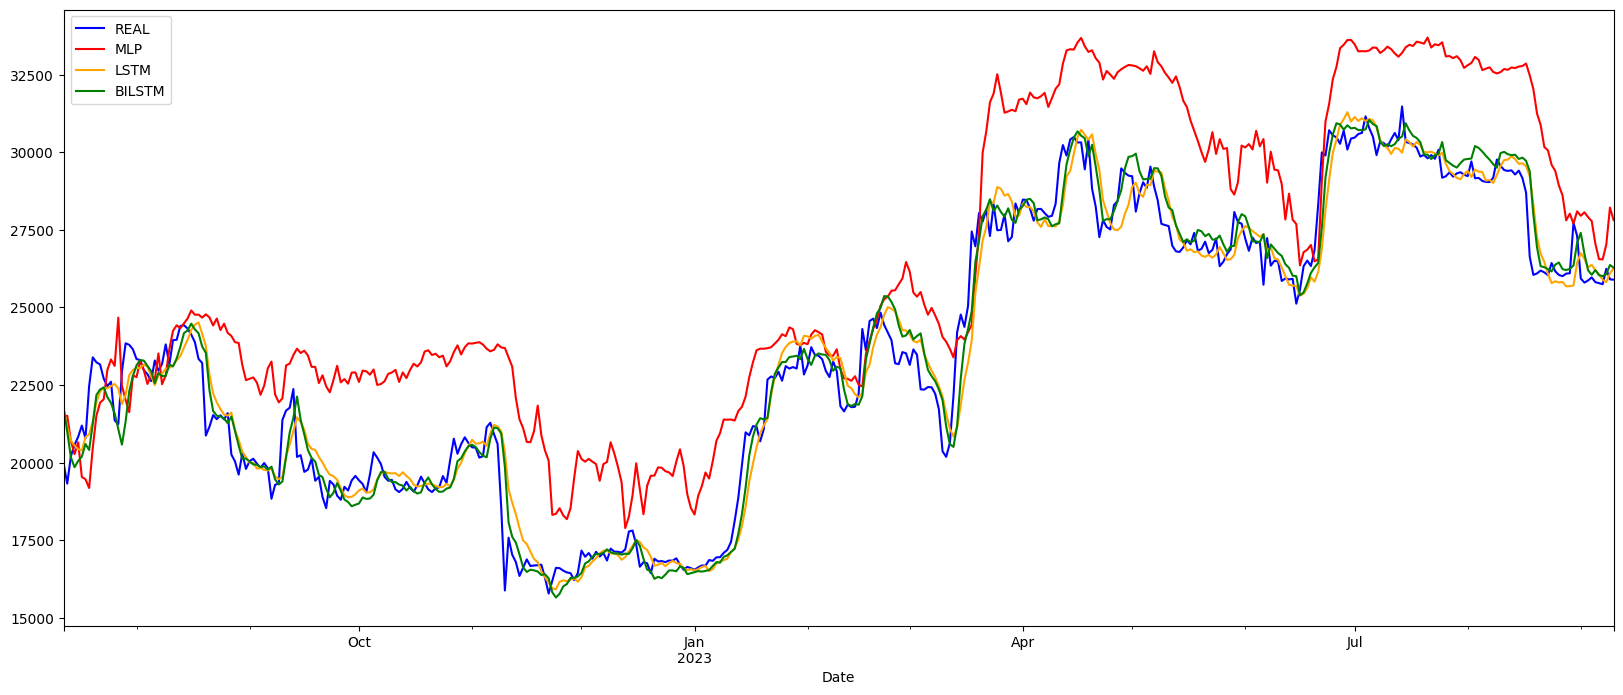

In [ ]:
results['Open'].plot(figsize=(20,8), color='blue')
results['predictionsmlp'].plot(color='red')
results['predictionslstm'].plot(color='orange')
results['predictionsbilstm'].plot(color='green')
plt.legend(['REAL','MLP','LSTM','BILSTM'])
plt.show()

In [ ]:
print(mean_absolute_error(results['Open'],results['predictionsmlp']))
print(mean_absolute_error(results['Open'],results['predictionslstm']))
print(mean_absolute_error(results['Open'],results['predictionsbilstm']))

2734.8135682585093
633.3267472674589
551.8835552376761


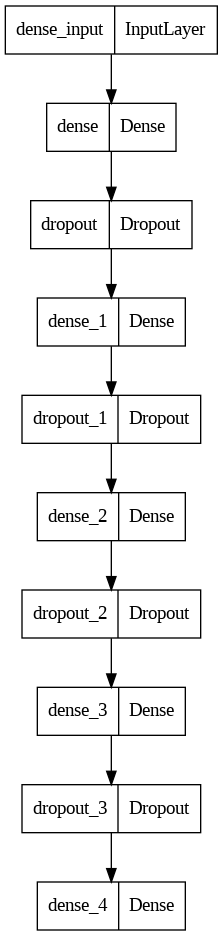

In [ ]:
plot_model(mlp, to_file='model.png')

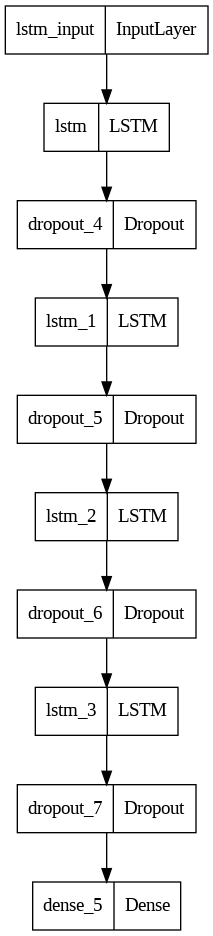

In [ ]:
plot_model(lstm, to_file='model.png')

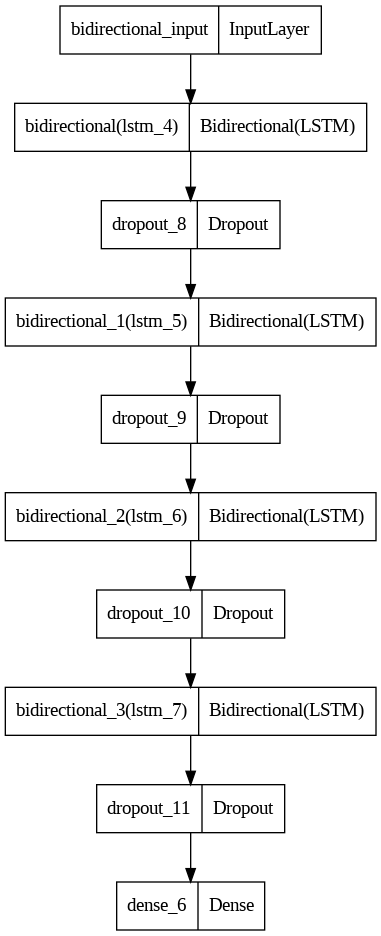

In [ ]:
plot_model(bilstm, to_file='model.png')